In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
books = pd.read_csv('./data/books.csv')

ratings = pd.read_csv('./data/ratings.csv')

tags = pd.read_csv('./data/tags.csv')

In [47]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [48]:
books['original_publication_year'] = pd.to_numeric(books['original_publication_year'], errors='coerce')
books.dropna(subset=['original_publication_year'], inplace=True) 
books['original_publication_year'] = books['original_publication_year'].astype(int) 

In [49]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [50]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [51]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          697
isbn13                        582
authors                         0
original_publication_year       0
original_title                570
title                           0
language_code                1079
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [52]:
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [53]:
tags.isnull().sum()

tag_id      0
tag_name    0
dtype: int64

In [54]:
books.duplicated().sum()

0

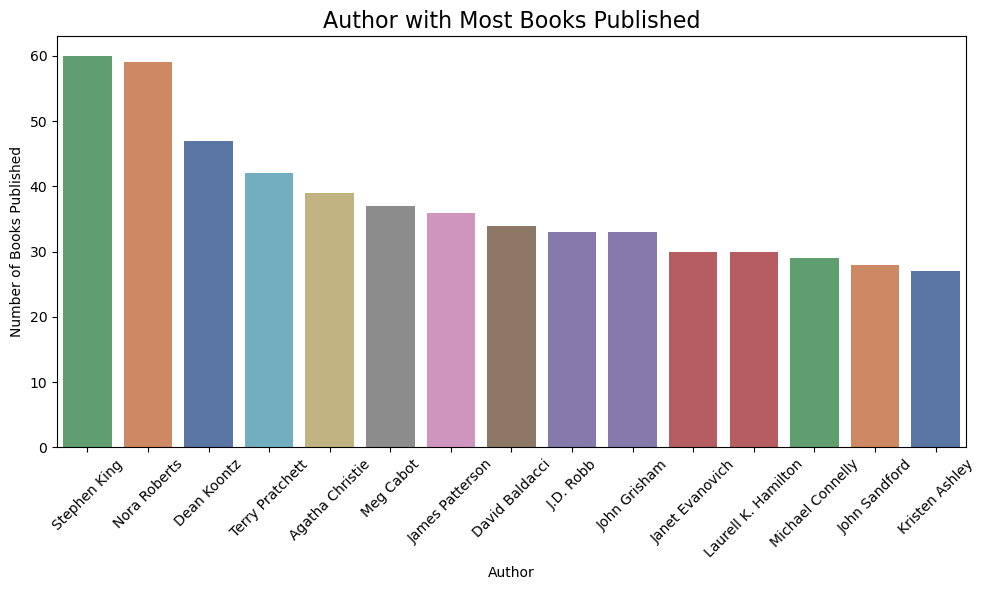

In [78]:
author_count = books['authors'].value_counts().reset_index(name='count').sort_values('count', ascending=False).head(15)

plt.figure(figsize=(10, 6)) 
sns.barplot(data=author_count, x='authors', y='count', palette='deep', hue='count', legend=False) 


plt.title("Author with Most Books Published", size=16)
plt.xlabel("Author")
plt.ylabel("Number of Books Published")

plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()


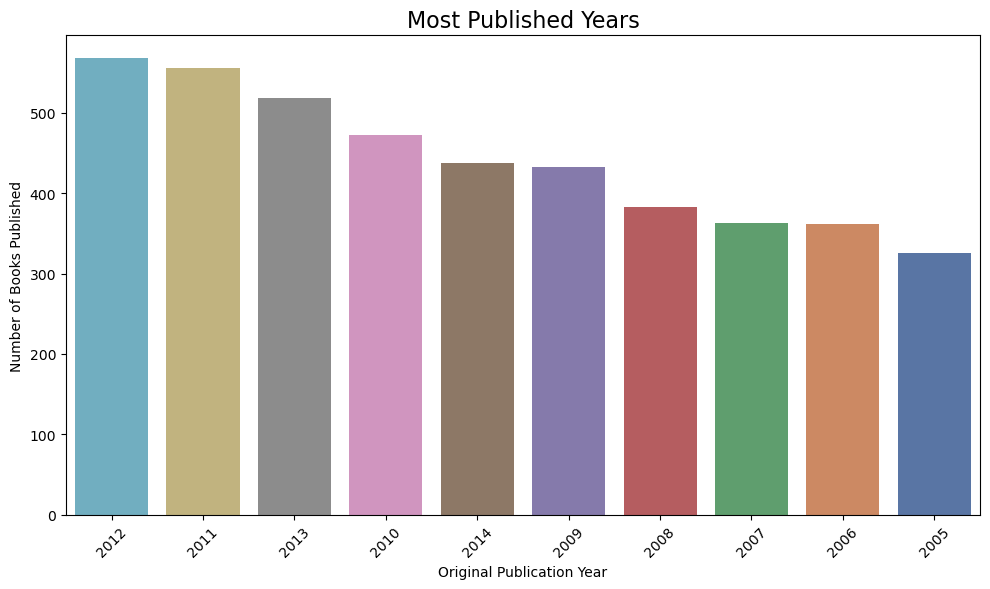

In [77]:
year_count = books['original_publication_year'].value_counts().reset_index(name='count').sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 6)) 
sns.barplot(data=year_count, x='original_publication_year', y='count', order=year_count['original_publication_year'], palette='deep', hue='count', legend=False) 


plt.title("Most Published Years", size=16)
plt.xlabel("Original Publication Year")
plt.ylabel("Number of Books Published")

plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

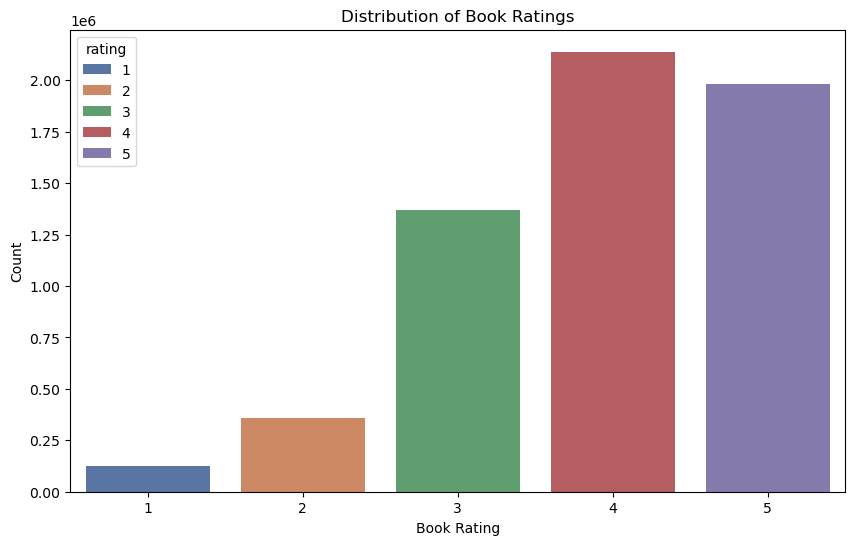

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='deep', hue='rating')
plt.title("Distribution of Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.show()

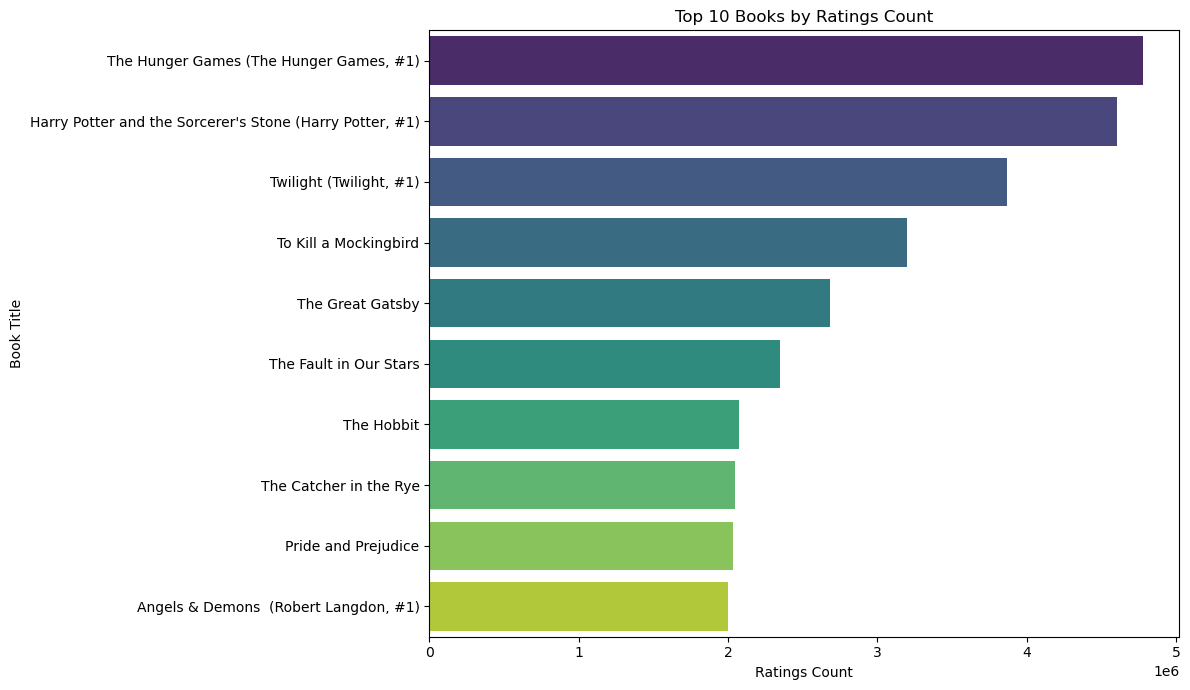

In [63]:
top_10_books = books.nlargest(10, 'ratings_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='ratings_count', y='title', data=top_10_books, palette='viridis', hue= 'title')
plt.title('Top 10 Books by Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

In [89]:
author_ratings_summary = books.groupby('authors').agg(
    total_ratings_count=('ratings_count', 'sum'),
    avg_author_rating=('average_rating', 'mean'), 
    num_books=('authors', 'count') 
).reset_index()


authors_by_most_ratings = author_ratings_summary.sort_values(by='total_ratings_count',ascending=False)

print("Authors ranked by the total number of ratings received across all their books:")
print(authors_by_most_ratings.head(10)) 


Authors ranked by the total number of ratings received across all their books:
                          authors  total_ratings_count  avg_author_rating  \
1864  J.K. Rowling, Mary GrandPré             13372767           4.547500   
4212              Suzanne Collins              8646393           4.220000   
4143              Stephenie Meyer              8403438           3.806364   
4118                 Stephen King              6505240           3.962667   
1874               J.R.R. Tolkien              5262785           4.430000   
3724                 Rick Riordan              5126661           4.304091   
900                     Dan Brown              5002760           3.794286   
3346              Nicholas Sparks              4270228           4.007368   
670               Cassandra Clare              4234130           4.400769   
2257                   John Green              3903939           3.965000   

      num_books  
1864          8  
4212          9  
4143         11  
4